In [1]:

from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
print("iris_dataset의 키: \n{}".format(iris_dataset.keys()))

iris_dataset의 키: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [3]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


In [4]:
print(type(iris_dataset['data']))
print("data의 크기: {}".format(iris_dataset['data'].shape))

<class 'numpy.ndarray'>
data의 크기: (150, 4)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)



In [6]:
print("X_train 크기 : {}".format(X_train.shape))
print("y_train 크기 : {}".format(y_train.shape))

X_train 크기 : (112, 4)
y_train 크기 : (112,)


In [7]:
import pandas as pd
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
print(iris_dataframe)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.9               3.0                4.2               1.5
1                  5.8               2.6                4.0               1.2
2                  6.8               3.0                5.5               2.1
3                  4.7               3.2                1.3               0.2
4                  6.9               3.1                5.1               2.3
5                  5.0               3.5                1.6               0.6
6                  5.4               3.7                1.5               0.2
7                  5.0               2.0                3.5               1.0
8                  6.5               3.0                5.5               1.8
9                  6.7               3.3                5.7               2.5
10                 6.0               2.2                5.0               1.5
11                 6.7               2.5                5.8     

In [8]:
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='0', hist_kwds={'bins' : 20}, s=60, alpha=.8, cmap=mglearn.cm3)


NameError: name 'mglearn' is not defined

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='0', hist_kwds={'bins' : 20}, s=60, alpha=.8, )



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12D08150>,
      dtype=object)

In [10]:
print(iris_dataset)


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [11]:
print(iris_dataset.feature_names)
print(type(iris_dataset))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
<class 'sklearn.utils.Bunch'>


In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [13]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [14]:
prediction = knn.predict(X_new)
print("예측:{}".format(prediction))
print("예측한 타깃의 이름: {}".format(iris_dataset['target_names'][prediction]))
                         

예측:[0]
예측한 타깃의 이름: ['setosa']


In [15]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n {}".format(y_pred))

테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [16]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred==y_test)))


테스트 세트의 정확도: 0.97

X.shape: (26, 2)


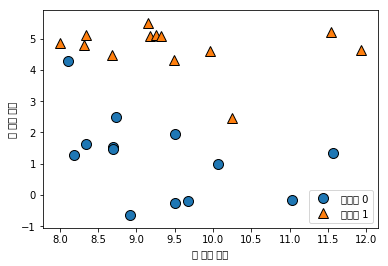

In [24]:
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, '타깃')

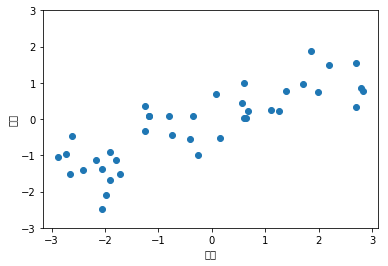

In [25]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")